In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#將MNIST 手寫數字資料讀進來
mnist = tf.keras.datasets.mnist

# mnist 的load_data()會回傳已經先分割好的training data 和 testing data
# 並且將每個 pixel 的值從 Int 轉成 floating point 同時做normalize(這是很常見的preprocessing)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
print(len(x_train)) #training data 總共有60000張圖片
print(x_train[0].shape) #每張圖片（拿第一張當樣本）大小為 28x28

60000
(28, 28)


In [4]:
X_train = np.reshape(x_train,(60000,28*28))

In [5]:
#from sklearn.decomposition import PCA
#import numpy as np
#pca=PCA(400)
#pca.fit(X0_train)
#pca.components_  #返回模型的各個特徵向量

In [6]:
#sum(pca.explained_variance_ratio_)  #返回各個成為各自的方差百分比（貢獻率）

In [7]:
#X_train=pca.transform(X0_train) 

In [8]:
X_test = np.reshape(x_test,(10000,28*28))

In [9]:
#pcat=PCA(400)
#pcat.fit(X0_test)

In [10]:
#X_test=pcat.transform(X0_test) 

In [11]:
from sklearn import datasets, svm, metrics

In [12]:
param_C = 5
param_gamma = 0.05
classifier = svm.SVC(C=param_C,gamma=param_gamma)

In [13]:
classifier.fit(X_train, y_train)

SVC(C=5, gamma=0.05)

In [14]:
expected = y_test
predicted = classifier.predict(X_test)

In [15]:
cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)

Confusion matrix:
[[ 973    0    1    0    0    2    1    1    2    0]
 [   0 1127    3    1    0    1    0    1    2    0]
 [   4    0 1015    0    1    0    0    6    6    0]
 [   0    0    2  995    0    3    0    6    4    0]
 [   0    0    3    0  966    0    4    0    2    7]
 [   2    0    0    5    1  878    2    1    2    1]
 [   4    2    0    0    2    3  946    0    1    0]
 [   0    3   10    1    1    0    0 1004    2    7]
 [   1    0    1    4    1    2    0    2  960    3]
 [   3    3    2    6    9    2    0    5    6  973]]


In [16]:
print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))

Accuracy=0.9837


In [17]:
def bar(X_train,y_train):
    S=[]
    for k in range(10):
        index=np.where(y_train==k)
        X=X_train[index]
        X_bar=sum(X)/(X.shape[0])
        
        S.append(X_bar)
    S=np.array(S)
    return S

In [18]:
S=bar(X_train,y_train)

<Figure size 432x288 with 0 Axes>

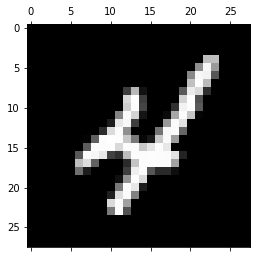

In [19]:
plt.gray()
plt.matshow(X_train[9].reshape(28,28))

In [20]:
def svm(Image0,Image1,Image0_test,Image1_test,s):
    import numpy
    import cvxopt
    from cvxopt import matrix, solvers
    solvers.options['show_progress'] = False  
    
    Image0=Image0[0:50]
    Image1=Image1[0:50]
    
    #Image0_test=Image0_test[0:20]
    #Image1_test=Image1_test[0:20]
    
    
    T0=matrix(Image0.reshape(len(Image0),784).tolist())
    T1=matrix(Image1.reshape(len(Image1),784).tolist())

    y1=matrix(np.ones([1,len(Image0)]).tolist())
    y2=(-1)*matrix(np.ones([1,len(Image1)]).tolist())
    y=matrix([y1,y2])

    T=matrix([T0.T,T1.T])

    t0=matrix(Image0_test.reshape(len(Image0_test),784).tolist())
    t1=matrix(Image1_test.reshape(len(Image1_test),784).tolist())

    y1=matrix(np.ones([1,len(Image0_test)]).tolist())
    y2=(-1)*matrix(np.ones([1,len(Image1_test)]).tolist())
    yt=matrix([y1,y2])

    t=matrix([t0.T,t1.T])

    
    P1=[]
    for i in range(T.size[0]):
        for j in range(T.size[0]):
            P1.append(y[i]*y[j]*np.exp(-s*(np.linalg.norm(T[i,:]-T[j,:]))**2))      

    
    P2=np.array(P1).reshape(T.size[0],T.size[0])
    P=matrix(P2)
    
    q1=-1*np.ones(T.size[0])
    q2=q1.astype(float)
    q=matrix(q1.tolist())
    y1=np.array(y).astype(float)
    A=matrix(y1.tolist(),(1,T.size[0]))
    b = matrix([0.0])

    G1=-1*matrix(np.eye(T.size[0]).tolist())
    G2=matrix(np.eye(T.size[0]).tolist())
    G=matrix([G1,G2])

    c1=0
    h1=c1*np.ones(T.size[0])
    h2=h1.astype(float)
    h_1=matrix(h2.tolist())

    c2=5
    hh1=c2*np.ones(T.size[0])
    hh2=hh1.astype(float)
    h_2=matrix(hh2.tolist())
    h=matrix([h_1,h_2])
    results_digit = solvers.qp(P,q,G,h,A,b)
    
    p0=np.argwhere(np.array(results_digit['x'])>0.0001)[0][0]
    p1=p0.tolist()
    
    a=matrix(results_digit['x'])
    b=0
    for i in range(T.size[0]):
        b=b+a[i]*y[i]*np.exp(-s*(np.linalg.norm(T[i,:]-T[p1,:]))**2)      

    b=y[p1]-b
    
    
    F=[]
    for j in range(t.size[0]):
        f=0
        for i in range(T.size[0]):
            f=f+a[i]*y[i]*np.exp(-s*(np.linalg.norm(T[i,:]-t[j,:]))**2)     
        f=f+b
        F.append(f)
    #correct
   # f=0
    #for i in range(T.size[0]):
    #        f=f+a[i]*y[i]*np.exp(-s*(np.linalg.norm(T[i,:]-T[0,:]))**2)     
    #f=f+b
    zi=0 #1*f

    
    
    return a,b,T.size[0],T,y,zi,print(1-np.abs(np.array(np.where(np.sign(F)>0)).size-len(Image0_test))/len(Image0_test))

In [21]:
def Image_data(n):
    itemindexn = np.argwhere(y_train==n)
    imagen=X_train[itemindexn]
    itemindexn = np.argwhere(y_test==n)
    imagen_test=X_test[itemindexn]

    return [imagen,imagen_test]

In [22]:
[image0,image0_test]=Image_data(0)
[image1,image1_test]=Image_data(1)
[image2,image2_test]=Image_data(2)
[image3,image3_test]=Image_data(3)
[image4,image4_test]=Image_data(4)
[image5,image5_test]=Image_data(5)
[image6,image6_test]=Image_data(6)
[image7,image7_test]=Image_data(7)
[image8,image8_test]=Image_data(8)
[image9,image9_test]=Image_data(9)

In [23]:
image1.shape

(6742, 1, 784)

<Figure size 432x288 with 0 Axes>

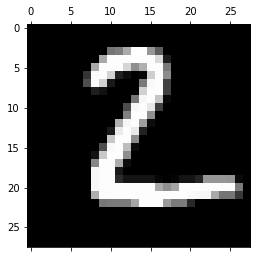

In [95]:
plt.gray()
plt.matshow(X_test[1].reshape(28,28))

In [25]:
m01=svm(image0,image1,image0_test,image1_test,0.01)

0.9979591836734694


In [26]:
m02=svm(image0,image2,image0_test,image2_test,0.01)

0.9918367346938776


In [27]:
m03=svm(image0,image3,image0_test,image3_test,0.01)

0.9959183673469387


In [28]:
m04=svm(image0,image4,image0_test,image4_test,0.01)

0.9826530612244898


In [29]:
m05=svm(image0,image5,image0_test,image5_test,0.01)

0.9959183673469387


In [30]:
m06=svm(image0,image6,image0_test,image6_test,0.01)

0.9846938775510204


In [31]:
m07=svm(image0,image7,image0_test,image7_test,0.01)

0.9918367346938776


In [32]:
m08=svm(image0,image8,image0_test,image8_test,0.01)

0.996938775510204


In [33]:
m09=svm(image0,image9,image0_test,image9_test,0.01)

0.9724489795918367


In [34]:
m12=svm(image1,image2,image1_test,image2_test,0.01)
m13=svm(image1,image3,image1_test,image3_test,0.01)
m14=svm(image1,image4,image1_test,image4_test,0.01)
m15=svm(image1,image5,image1_test,image5_test,0.01)
m16=svm(image1,image6,image1_test,image6_test,0.01) 
m17=svm(image1,image7,image1_test,image7_test,0.01)
m18=svm(image1,image8,image1_test,image8_test,0.01)
m19=svm(image1,image9,image1_test,image9_test,0.01)

0.986784140969163
0.9770925110132158
0.9982378854625551
0.9929515418502203
0.9947136563876652
0.9682819383259912
0.9762114537444934
0.9920704845814978


In [35]:
m23=svm(image2,image3,image2_test,image3_test,0.01)
m24=svm(image2,image4,image2_test,image4_test,0.01)
m25=svm(image2,image5,image2_test,image5_test,0.01)
m26=svm(image2,image6,image2_test,image6_test,0.01)
m27=svm(image2,image7,image2_test,image7_test,0.01)
m28=svm(image2,image8,image2_test,image8_test,0.01)
m29=svm(image2,image9,image2_test,image9_test,0.01)

0.9544573643410853
0.9777131782945736
0.999031007751938
0.9796511627906976
0.9922480620155039
0.9631782945736435
0.9748062015503876


In [36]:
m34=svm(image3,image4,image3_test,image4_test,0.01)
m35=svm(image3,image5,image3_test,image5_test,0.01)
m36=svm(image3,image6,image3_test,image6_test,0.01)
m37=svm(image3,image7,image3_test,image7_test,0.01)
m38=svm(image3,image8,image3_test,image8_test,0.01)
m39=svm(image3,image9,image3_test,image9_test,0.01)

0.9871287128712871
0.8881188118811881
0.9831683168316832
0.9861386138613861
0.9623762376237623
0.999009900990099


In [37]:
m45=svm(image4,image5,image4_test,image5_test,0.01)
m46=svm(image4,image6,image4_test,image6_test,0.01)
m47=svm(image4,image7,image4_test,image7_test,0.01)
m48=svm(image4,image8,image4_test,image8_test,0.01)
m49=svm(image4,image9,image4_test,image9_test,0.01)

0.9765784114052953
0.9959266802443992
0.9837067209775967
0.9877800407331976
0.9786150712830958


In [38]:
m48=svm(image4,image8,image4_test,image8_test,0.01)
m49=svm(image4,image9,image4_test,image9_test,0.01)

0.9877800407331976
0.9786150712830958


In [39]:
m56=svm(image5,image6,image5_test,image6_test,0.01)
m57=svm(image5,image7,image5_test,image7_test,0.01)
m58=svm(image5,image8,image5_test,image8_test,0.01)
m59=svm(image5,image9,image5_test,image9_test,0.01)

0.9652466367713004
0.984304932735426
0.9316143497757847
0.968609865470852


In [40]:
m67=svm(image6,image7,image6_test,image7_test,0.01)
m68=svm(image6,image8,image6_test,image8_test,0.01)
m69=svm(image6,image9,image6_test,image9_test,0.01)

m78=svm(image7,image8,image7_test,image8_test,0.01)
m79=svm(image7,image9,image7_test,image9_test,0.01)

m89=svm(image8,image9,image8_test,image9_test,0.01)

0.9979123173277662
0.9989561586638831
0.9770354906054279
0.9883268482490273
0.9494163424124513
0.997946611909651


In [41]:
parameter=[m01,m02,m03,m04,m05,m06,m07,m08,m09,m12,m13,m14,m15,m16,m17,m18,m19,m23,m24,m25,m26,m27,m28,m29,m34,m35,m36,m37,m38,m39,m45,m46,m47,m48,m49,m56,m57,m58,m59,m67,m68,m69,m78,m79,m89]

In [146]:
def svm_predict(m,n1,n2,X_test):
    import cvxopt
    from cvxopt import matrix, solvers
    
    f=0
    for i in range(m[2]):
        f=f+m[0][i]*m[4][i]*np.exp(-0.01*(np.linalg.norm(m[3][i,:]-matrix(X_test.reshape(1,784))))**2)     
    f=f+m[1]
    
    if np.sign(f)>0:
        predict=n1
    else:
        predict=n2
    #else:
    #    predict=-1
    return predict

In [148]:
svm_predict(m01,0,1,X_test[1])

0

In [149]:
def svm_newdata(M,X_test):
    s01=svm_predict(M[0],0,1,X_test)
    s02=svm_predict(M[1],0,2,X_test)
    s03=svm_predict(M[2],0,3,X_test)
    s04=svm_predict(M[3],0,4,X_test)
    s05=svm_predict(M[4],0,5,X_test)
    s06=svm_predict(M[5],0,6,X_test)
    s07=svm_predict(M[6],0,7,X_test)
    s08=svm_predict(M[7],0,8,X_test)
    s09=svm_predict(M[8],0,9,X_test)

    s12=svm_predict(M[9],1,2,X_test)
    s13=svm_predict(M[10],1,3,X_test)
    s14=svm_predict(M[11],1,4,X_test)
    s15=svm_predict(M[12],1,5,X_test)
    s16=svm_predict(M[13],1,6,X_test)
    s17=svm_predict(M[14],1,7,X_test)
    s18=svm_predict(M[15],1,8,X_test)
    s19=svm_predict(M[16],1,9,X_test)

    s23=svm_predict(M[17],2,3,X_test)
    s24=svm_predict(M[18],2,4,X_test)
    s25=svm_predict(M[19],2,5,X_test)
    s26=svm_predict(M[20],2,6,X_test)
    s27=svm_predict(M[21],2,7,X_test)
    s28=svm_predict(M[22],2,8,X_test)
    s29=svm_predict(M[23],2,9,X_test)

    s34=svm_predict(M[24],3,4,X_test)
    s35=svm_predict(M[25],3,5,X_test)
    s36=svm_predict(M[26],3,6,X_test)
    s37=svm_predict(M[27],3,7,X_test)
    s38=svm_predict(M[28],3,8,X_test)
    s39=svm_predict(M[29],3,9,X_test)

    s45=svm_predict(M[30],4,5,X_test)
    s46=svm_predict(M[31],4,6,X_test)
    s47=svm_predict(M[32],4,7,X_test)
    s48=svm_predict(M[33],4,8,X_test)
    s49=svm_predict(M[34],4,9,X_test)

    s56=svm_predict(M[35],5,6,X_test)
    s57=svm_predict(M[36],5,7,X_test)
    s58=svm_predict(M[37],5,8,X_test)  
    s59=svm_predict(M[38],5,9,X_test)

    s67=svm_predict(M[39],6,7,X_test)
    s68=svm_predict(M[40],6,8,X_test)
    s69=svm_predict(M[41],6,9,X_test)

    s78=svm_predict(M[42],7,8,X_test)
    s79=svm_predict(M[43],7,9,X_test)

    s89=svm_predict(M[44],8,9,X_test)

    nums=[s01,s02,s03,s04,s05,s06,s07,s08,s09,s12,s13,s14,s15,s16,s17,s18,s19,s23,s24,s24,s25,s26,s27,s28,s29,s34,s35,s36,s37,s38,s39,s45,s46,s47,s48,s49,s56,s57,s58,s59,s67,s68,s69,s78,s79,s89]
    counts = np.bincount(nums)
    return np.argmax(counts)

7

<Figure size 432x288 with 0 Axes>

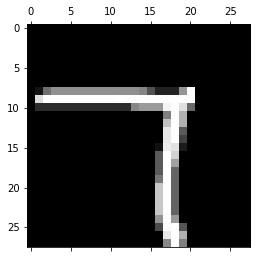

In [164]:
i0=np.random.randint(low=1,high=len(X_test),size=1)[0]
X_test[i0]

plt.gray()
plt.matshow(X_test[i0].reshape(28,28))
y_test[i0]

In [165]:
svm_newdata(parameter,X_test[i0])

7

In [172]:
score=0
ID=y_test
for i in range(len(ID)):
    if ((svm_newdata(parameter,X_test[i])-ID[i])==0):
        score=score+1
score/len(ID)

0.7757

In [173]:
score/len(ID)

0.7757